# Anhalyze Tutorial 


This tutorial takes you to discover the capabilities of Anhalyze. 
In particular of `AnhaDataset,` which is a python class that handles single `.nc` outputs
from NEMO ocean model simulations with the ANHA confinguration. 

Here we'll also use `downloader` a function that allows us to download a couple of test files used in the tutorial.

This tutorial assumes that you followed the installation instructions in the README.

#### Table of Contents:

* [Set Up](#set-up)
* [Example1: gridT](#example1)
    * [Static information](#static_info)
    * [Dynamic Functions](#methods)
* [Example2: icebergs](#example2)



### Set Up <a class="anchor" id="set-up"></a>


In [1]:
# We need to start by setting up this notebook environment by importing
# the packages we need: Anhalyze, downloader, and os.
%load_ext autoreload
%autoreload 2

# First we import anhalyze 
import anhalyze as ah

# ... than the downloader
import anhalyze.core.downloader as dw

# ... and other libraries we need.
import os


In [2]:
# This shows you how tu use this function
dw.download_example?

Signature: dw.download_example(file_type='gridT')
Docstring:
Downloads Anha file example.

Parameters
----------
file_type : str
    File type either 'gridT'(default) or 'icebergs'
File:      ~/ANHALYZE_dev/ANHALYZE/anhalyze/core/downloader.py
Type:      function

In [ ]:
# Firsts lets download some files. In this tutorial, we will be using tracer 
# variables from NEMO ocean module stored in gridT type files, as well as
# icebergs variables from the ICB module outputs. 

# Using the download_example() will download a gridT file as default.
dw.download_example()

# To download a different file you must specify the file_type. 
# The options are showed in the function help in the above code block.
dw.download_example(file_type='icebergs')


In [3]:
# The example files have been downloaded to the following location:

ah.PACKAGE_DATA_DIR

# Which is Anhalyze installation directory. 

'/home/camus/ANHALYZE_dev/ANHALYZE/anhalyze/package_data'

## Example 1: gridT <a class="anchor" id="example1"></a>

Let's use the gridT file to look at some temperature and salinity outputs.


In [4]:
# Listing the files in the directory above, we can check if there is
# a file with the string gridT in the name, than retreive the file name.
gridT_example_filename = [filename for filename in os.listdir(ah.PACKAGE_DATA_DIR) if 'gridT' '.nc' in filename][0]
gridT_example_filename


'ANHA4-WLS001_y1980m07d14_gridT.nc'

In [5]:
# Here we will use the AnhaDataset object for the first time. 
# The function needs only the file name or the path to the file (as in this tutorial):
gridT_example = ah.AnhaDataset(ah.PACKAGE_DATA_DIR+'/'+gridT_example_filename)

In [6]:
# Here you can find more information about how to use `AnhaDataset`.

ah.AnhaDataset?

# Technical note: 
# If you are familiar with the library `xarray` to open `.nc` files.
# You can see here `Anhadataset` is kind of a wrapper to `xarray.Dataset` with specific implemetation for ANHA files. 


Init signature:
ah.AnhaDataset(
    filename,
    load_data=True,
    mask_filename=None,
    _xr_dataset=None,
    _attrs=None,
)
Docstring:     
Wrapper :py:class: for `xarray.Dataset` with specific implementation
for netCDF files created with ANHA/NEMO ocean models. Similarly to a
`xarray.Dataset`, it organizes netCDF data into data_vars, coords,
attrs and dims.

Parameters
----------
filename : str
    Filename given with format */*/ANHA?-??????_y????m??d??_grid?.nc
load_data : bool, optional
    Bool for loading data (Default: True)
mask_filename : str, optional
    Mask filename(Default: )

Returns
-------
dataset : AnhaDataset
    `AnhaDataset` instance from given filename.
Init docstring:
Initializing object.

Parameters
----------
_xr_dataset : xarray.Dataset, optional
    Instance of xarray.Dataset object.
_attrs : dict, optional
    Dict of attributes, use internally.
File:           ~/ANHALYZE_dev/ANHALYZE/anhalyze/core/anhalyze.py
Type:           type
Subclasses:     

### Static information <a class="anchor" id="static_info"></a>

Then we can look at the information in the file:


In [7]:
# It includes 
# Dimentions:
gridT_example.dims

FrozenMappingWarningOnValuesAccess({'y_grid_T': 800, 'x_grid_T': 544, 'deptht': 50, 'axis_nbounds': 2, 'time_counter': 1})

In [8]:
# Attributes
gridT_example.attrs

# This contains the `xarray.Dataset.attrs` in 'xr_attrs', and includes more information specific to Anhalize.

{'filename': 'ANHA4-WLS001_y1980m07d14_gridT.nc',
 'filepath': '/home/camus/ANHALYZE_dev/ANHALYZE/anhalyze/package_data',
 'model_run': 'ANHA4-WLS001',
 'model_config': 'ANHA4',
 'model_case': 'WLS001',
 'grid': 'gridT',
 'date': 'y1980m07d14',
 'year': '1980',
 'month': '07',
 'day': '14',
 'dim_x': 'x_grid_T',
 'dim_y': 'y_grid_T',
 'dim_z': 'deptht',
 'coord_lat': 'nav_lat_grid_T',
 'coord_lon': 'nav_lon_grid_T',
 'coord_depth': 'deptht',
 'xr_attrs': {'name': 'ANHA4-WLS001',
  'description': 'ocean T grid variables',
  'title': 'ocean T grid variables',
  'Conventions': 'CF-1.6',
  'timeStamp': '2024-May-26 17:12:45 EDT',
  'mask_filename': '/home/camus/ANHALYZE_dev/ANHALYZE/anhalyze/package_data/ANHA4_mask.nc'},
 'coord_lat_range': [np.float32(-20.07611), np.float32(89.94787)],
 'coord_lon_range': [np.float32(-179.99701), np.float32(179.99971)],
 'dim_x_range': [0, 544],
 'dim_y_range': [0, 800],
 'coord_depth_range': [np.float32(0.49402538), np.float32(5727.9165)],
 'dim_z_range'

In [9]:
# Coordinates
gridT_example.coords


Coordinates:
    nav_lat_grid_T  (y_grid_T, x_grid_T) float32 2MB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    nav_lon_grid_T  (y_grid_T, x_grid_T) float32 2MB 0.0 0.0 0.0 ... 0.0 0.0 0.0
  * deptht          (deptht) float32 200B 0.494 1.541 ... 5.275e+03 5.728e+03
    time_centered   (time_counter) object 8B ...
  * time_counter    (time_counter) object 8B 1980-07-12 12:00:00

In [10]:
# Data variables:
gridT_example.data_vars


Data variables:
    deptht_bounds         (deptht, axis_nbounds) float32 400B ...
    votemper              (time_counter, deptht, y_grid_T, x_grid_T) float32 87MB ...
    time_centered_bounds  (time_counter, axis_nbounds) object 16B ...
    time_counter_bounds   (time_counter, axis_nbounds) object 16B ...
    vosaline              (time_counter, deptht, y_grid_T, x_grid_T) float32 87MB ...
    sossheig              (time_counter, y_grid_T, x_grid_T) float32 2MB ...
    somxl010              (time_counter, y_grid_T, x_grid_T) float32 2MB ...
    sohmld                (time_counter, y_grid_T, x_grid_T) float32 2MB ...
    somxlts               (time_counter, y_grid_T, x_grid_T) float32 2MB ...
    vopo4                 (time_counter, deptht, y_grid_T, x_grid_T) float32 87MB ...
    vodop                 (time_counter, deptht, y_grid_T, x_grid_T) float32 87MB ...
    vofed                 (time_counter, deptht, y_grid_T, x_grid_T) float32 87MB ...
    vooxy                 (time_counter,

In [11]:
# you can also use this nice xarray html representation which allows to manipulate the way you see all the information above.

gridT_example

[Anhalyze] Filename: ANHA4-WLS001_y1980m07d14_gridT.nc 
<xarray.Dataset> Size: 2GB
Dimensions:               (y_grid_T: 800, x_grid_T: 544, deptht: 50,
                           axis_nbounds: 2, time_counter: 1)
Coordinates:
    nav_lat_grid_T        (y_grid_T, x_grid_T) float32 2MB 0.0 0.0 ... 0.0 0.0
    nav_lon_grid_T        (y_grid_T, x_grid_T) float32 2MB 0.0 0.0 ... 0.0 0.0
  * deptht                (deptht) float32 200B 0.494 1.541 ... 5.728e+03
    time_centered         (time_counter) object 8B ...
  * time_counter          (time_counter) object 8B 1980-07-12 12:00:00
Dimensions without coordinates: y_grid_T, x_grid_T, axis_nbounds
Data variables: (12/26)
    deptht_bounds         (deptht, axis_nbounds) float32 400B ...
    votemper              (time_counter, deptht, y_grid_T, x_grid_T) float32 87MB ...
    time_centered_bounds  (time_counter, axis_nbounds) object 16B ...
    time_counter_bounds   (time_counter, axis_nbounds) object 16B ...
    vosaline              (time_cou

### Dynamic Functions <a class="anchor" id="methods"></a>

The example file was open with `AnhaDataset,` so is an *instance* of that python class. As such, besides the static information (class *attributes*), it also contains functions (class *methods*).

So far, Anhalyze can perform three tasks:

- Data selection: Slice the original AnhaDataset from the ANHA domain into a smaller region.
- File output: Export the selected region as a new netcdf file.
- Mapping: Anhalyze is able to quickly plot spatial data into projected maps. 


#### Data Selection

In [12]:
# We can select a region based on given ranges of latitude(degrees North), longitude(degrees East) and depth (positive)_. 
# We give values in the specified units.

gridT_example.sel?

Signature: gridT_example.sel(lat_range=None, lon_range=None, depth_range=None)
Docstring:
Returns a new `AnhaDataset` with each data array indexed
along the specified coordinate(s) in `AnhaDataset.coords`.

In contrast to `AnhaDataset.isel`, indexers for this method should use
'geographical' values, instead of 'cartesian' integers.

Parameters
----------
lat_range : list
    Two element list containing min and max Latitude values for selection. [in degrees]
lon_range : list
    Two element list containing min and max Longitude values for selection. [in degrees]
depth_range : list
    Two element list containing min and max depth values for selection. [in meters]

Returns
-------
out : AnhaDataset
    An `AnhaDataset` given lat, lon and/or depth range.
File:      ~/ANHALYZE_dev/ANHALYZE/anhalyze/core/anhalyze.py
Type:      method

In [13]:
# We can also select a region based on given ranges of latitude, longitude and depth. 
# But using grid units, indicating i, j, and k positions.

gridT_example.isel?

Signature: gridT_example.isel(x_range=None, y_range=None, z_range=None)
Docstring:
Returns a new `AnhaDataset` with each data array indexed
along the specified dimension(s) in `AnhaDataset.dims`.
Using 'cartesian' integer values.

Parameters
----------
x_range : list
    Two element list containing min and max x values for selection.
y_range : list
    Two element list containing min and max y values for selection.
z_range : list
    Two element list containing min and max z values for selection.

Returns
-------
out : AnhaDataset
    An AnhaDataset given x, y and/or z range.
File:      ~/ANHALYZE_dev/ANHALYZE/anhalyze/core/anhalyze.py
Type:      method

In [14]:
# We'll then select a region by given latitude, longitude and depth ranges.
# Let's create a new variable:

gridT_example_region = gridT_example.sel(lat_range=[50,65],lon_range=[-93,-75],depth_range=[0,300])

# Note you can also call it like this:  

# gridT_example_region = gridT_example.sel([50,65],[-93,-75],[0,300])

# as long as you give latitude, longitude and depth range in that order.

[Anhalyze] Selecting Latitude range: [50, 65]
[Anhalyze] Selecting Longitude range: [-93, -75]
[Anhalyze] Warning: coord_depth using edge value 0.4940253794193268 since given value 0 is out of bounds.
[Anhalyze] Selecting Depth range: [np.float32(0.49402538), 300]


In [15]:
# You can inspect the selected region attributes like this:

gridT_example_region

[Anhalyze] Filename: ANHA4-WLS001_y1980m07d14_gridT.nc 
<xarray.Dataset> Size: 35MB
Dimensions:               (y_grid_T: 160, x_grid_T: 101, deptht: 28,
                           axis_nbounds: 2, time_counter: 1)
Coordinates:
    nav_lat_grid_T        (y_grid_T, x_grid_T) float32 65kB 0.0 0.0 ... 68.1
    nav_lon_grid_T        (y_grid_T, x_grid_T) float32 65kB 0.0 0.0 ... -80.87
  * deptht                (deptht) float32 112B 0.494 1.541 ... 222.5 266.0
    time_centered         (time_counter) object 8B ...
  * time_counter          (time_counter) object 8B 1980-07-12 12:00:00
Dimensions without coordinates: y_grid_T, x_grid_T, axis_nbounds
Data variables: (12/26)
    deptht_bounds         (deptht, axis_nbounds) float32 224B ...
    votemper              (time_counter, deptht, y_grid_T, x_grid_T) float32 2MB ...
    time_centered_bounds  (time_counter, axis_nbounds) object 16B ...
    time_counter_bounds   (time_counter, axis_nbounds) object 16B ...
    vosaline              (time_cou

#### File input/output (I/O)

In [16]:
# This new AnhaDataset can be saved to disk as netcdf file 
# with the following command

gridT_example_region.to_netcdf?

# We caution here that contratry to xarray.Dataset.to_netcdf we avoid overwriting files.
# The function assure to add a suffix to the new netcdf file, which can chosen by the user.

Signature:
gridT_example_region.to_netcdf(
    path=None,
    filename=None,
    suffix='_CutRegion.nc',
    **kwargs,
)
Docstring:
Writes `AnhaDataset` contents to netCDF file.
    For additional options see: `self._xr_dataset.to_netcdf`

    Note: Behaviour differs from `xarray.Dataset.to_netcdf` since here we avoid overwriting files.

Parameters
----------
path : str, optional
    Path to which to save this  `AnhaDatabase`.
filename : str, optional
    Filename to which to save this `AnhaDatabase`.
suffix : str, default: _CutRegion.nc
    Suffix added to filename to avoid overwriting.
File:      ~/ANHALYZE_dev/ANHALYZE/anhalyze/core/anhalyze.py
Type:      method

In [17]:

# This new dataset can be saved to disk:
gridT_example_region.to_netcdf()

# .. and open again by adding the defuault suffix
region_filename = ah.PACKAGE_DATA_DIR+'/'+gridT_example_filename.replace('.nc','_CutRegion.nc')
gridT_example_region_from_file = ah.AnhaDataset(region_filename)


[Anhalyze] Saving: /home/camus/ANHALYZE_dev/ANHALYZE/anhalyze/package_data/ANHA4-WLS001_y1980m07d14_gridT_CutRegion.nc


In [18]:
# Again, you can inspect the attributes like this:

gridT_example_region_from_file

[Anhalyze] Filename: ANHA4-WLS001_y1980m07d14_gridT_CutRegion.nc 
<xarray.Dataset> Size: 35MB
Dimensions:               (y_grid_T: 160, x_grid_T: 101, deptht: 28,
                           axis_nbounds: 2, time_counter: 1)
Coordinates:
    nav_lat_grid_T        (y_grid_T, x_grid_T) float32 65kB 0.0 0.0 ... 68.1
    nav_lon_grid_T        (y_grid_T, x_grid_T) float32 65kB 0.0 0.0 ... -80.87
  * deptht                (deptht) float32 112B 0.494 1.541 ... 222.5 266.0
    time_centered         (time_counter) object 8B ...
  * time_counter          (time_counter) object 8B 1980-07-12 12:00:00
Dimensions without coordinates: y_grid_T, x_grid_T, axis_nbounds
Data variables: (12/26)
    deptht_bounds         (deptht, axis_nbounds) float32 224B ...
    votemper              (time_counter, deptht, y_grid_T, x_grid_T) float32 2MB ...
    time_centered_bounds  (time_counter, axis_nbounds) object 16B ...
    time_counter_bounds   (time_counter, axis_nbounds) object 16B ...
    vosaline             

#### Mapping

In [19]:
# The last but not least Anhalyze tool is to plot spatial data
# into a projected map, creating figures in a vary simple way.

gridT_example_region.show_var_data_map?



Signature:
gridT_example_region.show_var_data_map(
    var,
    color_range='physical',
    savefig=None,
    projection_name='LambertConformal',
)
Docstring:
Displays a map for given var in `AnhaDataset.data_vars`.

Parameters
----------
var : str
    Variable name.
color_range : str
    Color range either `physical` limits, or `relative` values.
savefig : str
    Filename to save figure including path.
projection_name : str
    Projection name from Cartopy list .
File:      ~/ANHALYZE_dev/ANHALYZE/anhalyze/core/anhalyze.py
Type:      method

/home/camus/ANHALYZE_dev/anha_venv/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1768: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)


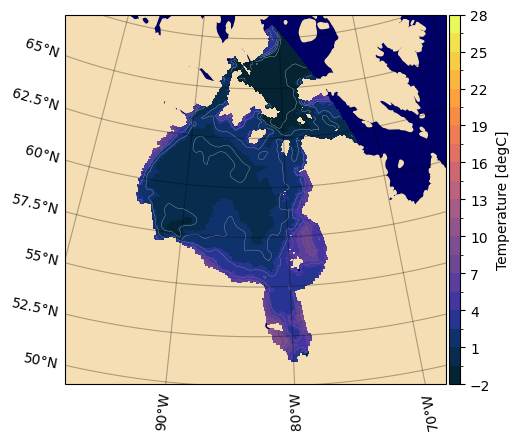

In [20]:
# Here we show the water surface temperature, and you can see the region we selected is Hudson Bay!
# You might be wondering: I gave a depth range, what is the plotting going to show?

# For now, the function only plots the first selected layer. In this tutorial case,
# the figure map will be showing the sea surface temperature:

gridT_example_region_from_file.show_var_data_map(var='votemper')


  vrange: [np.float32(-2.061082), np.float32(10.405585)]


/home/camus/ANHALYZE_dev/anha_venv/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1768: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)


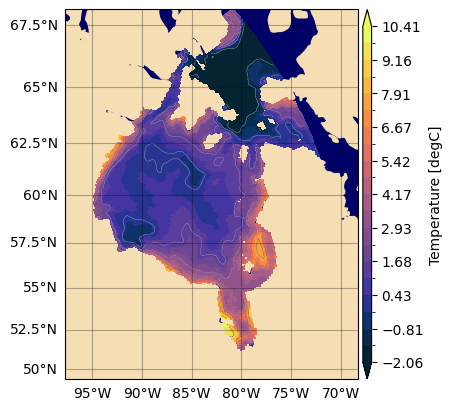

In [21]:
# There are three different ways to set the color_range in this function:
# The first one (the figure above) uses the pre-defined default variable range.

# The second one (relative) uses the maximun and minimum values within the selected area:

gridT_example_region_from_file.show_var_data_map(var='votemper', color_range='relative', projection_name='Mercator')

/home/camus/ANHALYZE_dev/anha_venv/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1768: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)


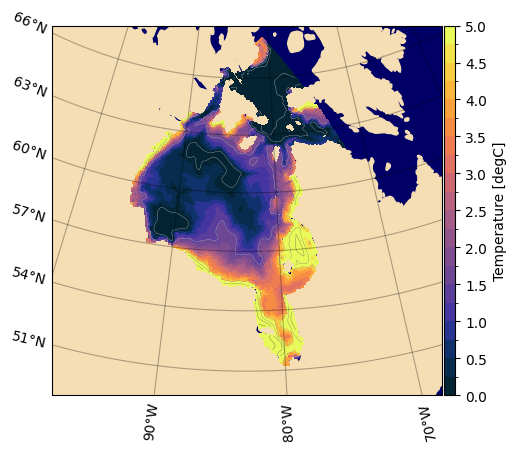

In [22]:
# The last but not least, you can give the function a list with min and max.

gridT_example_region_from_file.show_var_data_map(var='votemper', color_range=[0, 5], projection_name='NorthPolarStereo')

In [23]:
# You might have noticed that we have made figures using three different projections.
# The projections used here comes from the Cartopy projection list. 
# Not all Cartopy projections are available, but we set up few of them so you can pick the best one
# to represent your data.

/home/camus/ANHALYZE_dev/anha_venv/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1768: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)


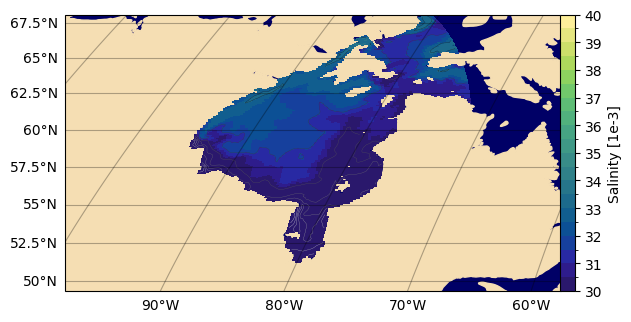

In [24]:
# also the color palette uses the cmocean library 
# which is a package to help standardize colormaps for commonly-plotted oceanographic properties.

# and here we show salinity. 

gridT_example_region_from_file.show_var_data_map(var='vosaline', projection_name='Robinson')

/home/camus/ANHALYZE_dev/anha_venv/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1768: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)


[Anhalyze] Saving figure: /home/camus/ANHALYZE_dev/ANHALYZE/anhalyze/package_data/ANHA4-WLS001_y1980m07d14_gridT_CutRegion.png


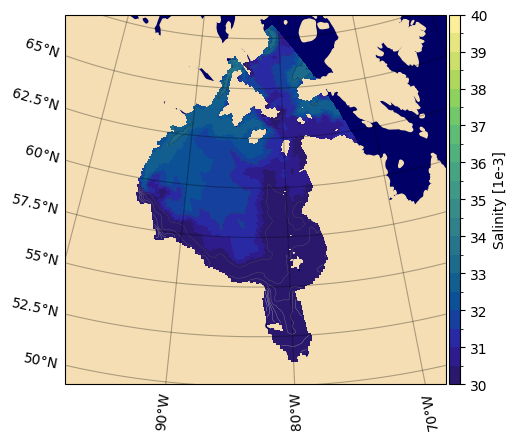

In [25]:
# finally we can save the figure to file:

savefig_filename = gridT_example_region_from_file.attrs['filename'].replace('.nc','.png')
gridT_example_region_from_file.show_var_data_map(var='vosaline',savefig=savefig_filename)


## Example 2: icebergs <a class="anchor" id="example2"></a>


We can also open iceberg and icemod files! 
Lets use the icebergs file we downloaded at the begining of the tutorial.


In [26]:
# Now lets check the icebergs example

icebergs_example_filename = [filename for filename in os.listdir(ah.PACKAGE_DATA_DIR) if 'icebergs' '.nc' in filename][0]
icebergs_example_filename


'ANHA4-WLS001_y1980m01d05_icebergs.nc'

In [27]:
# We open the file the same way
# Almost all the functionallity are avaialble except for depth. 

icebergs_example = ah.AnhaDataset(ah.PACKAGE_DATA_DIR+'/'+icebergs_example_filename)
icebergs_example

[Anhalyze] Filename: ANHA4-WLS001_y1980m01d05_icebergs.nc 
<xarray.Dataset> Size: 61MB
Dimensions:               (y: 800, x: 544, icbcla: 10, time_counter: 1,
                           axis_nbounds: 2)
Coordinates:
    nav_lat               (y, x) float32 2MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    nav_lon               (y, x) float32 2MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
  * icbcla                (icbcla) float32 40B 1.0 2.0 3.0 4.0 ... 8.0 9.0 10.0
    time_centered         (time_counter) object 8B ...
  * time_counter          (time_counter) object 8B 1980-01-03 12:00:00
Dimensions without coordinates: y, x, axis_nbounds
Data variables: (12/17)
    berg_melt             (time_counter, y, x) float32 2MB ...
    time_centered_bounds  (time_counter, axis_nbounds) object 16B ...
    time_counter_bounds   (time_counter, axis_nbounds) object 16B ...
    berg_buoy_melt        (time_counter, y, x) float32 2MB ...
    berg_eros_melt        (time_counter, y, x) float32 2MB ...
    berg_con

In [28]:
# We can look at the melting rate for instance:

icebergs_example.data_vars['berg_floating_melt']

<xarray.DataArray 'berg_floating_melt' (time_counter: 1, y: 800, x: 544)> Size: 2MB
[435200 values with dtype=float32]
Coordinates:
    nav_lat        (y, x) float32 2MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    nav_lon        (y, x) float32 2MB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    time_centered  (time_counter) object 8B ...
  * time_counter   (time_counter) object 8B 1980-01-03 12:00:00
Dimensions without coordinates: y, x
Attributes:
    long_name:           icb melt rate of icebergs + bits
    units:               kg/m2/s
    online_operation:    average
    interval_operation:  1080 s
    interval_write:      5 d
    cell_methods:        time: mean (interval: 1080 s)

[Anhalyze] Selecting Latitude range: [55, 80]
[Anhalyze] Selecting Longitude range: [-65, -55]


/home/camus/ANHALYZE_dev/anha_venv/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1768: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = super().pcolormesh(*args, **kwargs)


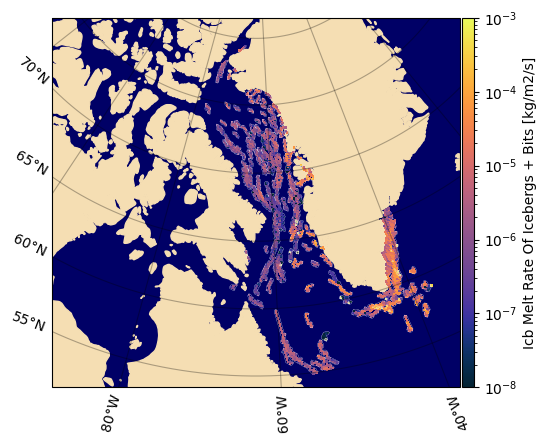

In [29]:

# We first select a region:
icebergs_example_region = icebergs_example.sel(lat_range=[55,80],lon_range=[-65,-55])

# Different from the gridT, gridUVW, and gridB, icebergs and icemod (LIM2) files
# don't need the depth range input, as their variables are 2 dimensional.

# Let's make a map!
icebergs_example_region.show_var_data_map('berg_floating_melt', projection_name='AlbersEqualArea')


## THE END

This is a work in progress.